# ANN

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LinearRegression, Ridge
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from scipy import stats

## Open Data

In [32]:
file_path = '/Users/arnaudCruchaudet/Desktop/mon_fichier.xlsx'
data = pd.read_excel(file_path)

In [33]:
data.head()

,Urine level,Paper level,Feces Level,Blue LED 1\nPhotodiode 1,Blue LED 1\nPhotodiode 2,Green LED 1\nPhotodiode 1,Green LED 1\nPhotodiode 2,Red LED 1\nPhotodiode 1,Red LED 1\nPhotodiode 2,Blue LED 2\nPhotodiode 1,...,Red LED 2\nPhotodiode 1,Red LED 2\nPhotodiode 2,Flush volume,number from 0 to 51,Case of flush,PCB value,res_GL2_1,res_GL1_1,res_GL2_2,res_GL1_2
0,0,0,0,385,766,-0.429420,332,555,841,230,...,347,345,0.0,0,0,0,35.455362,-0.429420,-0.429420,-0.429420
1,0,0,1,186,222,3.627595,87,276,194,105,...,170,97,2.8,14,4,5,15.701474,3.627595,3.627595,3.627595
2,0,0,2,90,721,2.984958,306,136,752,38,...,60,27,4.2,28,7,7,5.306403,2.984958,2.984958,2.984958
3,0,1,0,407,771,-0.593840,335,586,844,186,...,283,307,1.5,1,1,1,29.261866,-0.593840,-0.593840,-0.593840
4,0,1,0,412,771,-0.638170,335,592,844,178,...,268,311,1.5,1,1,1,27.435265,-0.638170,-0.638170,-0.638170


## Target Variable & Features

In [34]:
features = ["Blue LED 1\nPhotodiode 1", "Blue LED 1\nPhotodiode 2",
           "res_GL1_1", "res_GL1_2", 
           "Red LED 1\nPhotodiode 1", "Red LED 1\nPhotodiode 2", 
           "Blue LED 2\nPhotodiode 1", "Blue LED 2\nPhotodiode 2", 
           "res_GL2_1", "res_GL2_2", 
           "Red LED 2\nPhotodiode 1", "Red LED 2\nPhotodiode 2"]

X = data[features]
y = data['Case of flush']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Transformer

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(None,12)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs = 300

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 128)         1664      
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 dense_4 (Dense)             (None, None, 128)         16512     
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 dense_5 (Dense)             (None, None, 12)          1548      
                                                                 
Total params: 19,724
Trainable params: 19,724
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/300
13/13 [==============================] - 1s 10ms/step - loss: 2.4435 - accuracy: 0.1333 - val_loss: 2.3668 - val_accuracy: 0.1888
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 2.3100 - accuracy: 0.2282 - val_loss: 2.2253 - val_accuracy: 0.1786
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 2.1574 - accuracy: 0.2077 - val_loss: 2.0647 - val_accuracy: 0.2143
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 1.9895 - accuracy: 0.2397 - val_loss: 1.9178 - val_accuracy: 0.2296
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 1.8732 - accuracy: 0.2449 - val_loss: 1.8102 - val_accuracy: 0.2857
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 1.7861 - accuracy: 0.2808 - val_loss: 1.7320 - val_accuracy: 0.3724
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 1.7452 - accuracy: 0.2910 - val_loss: 1.6760 - val_accuracy: 0.3929
Epoch 8/300


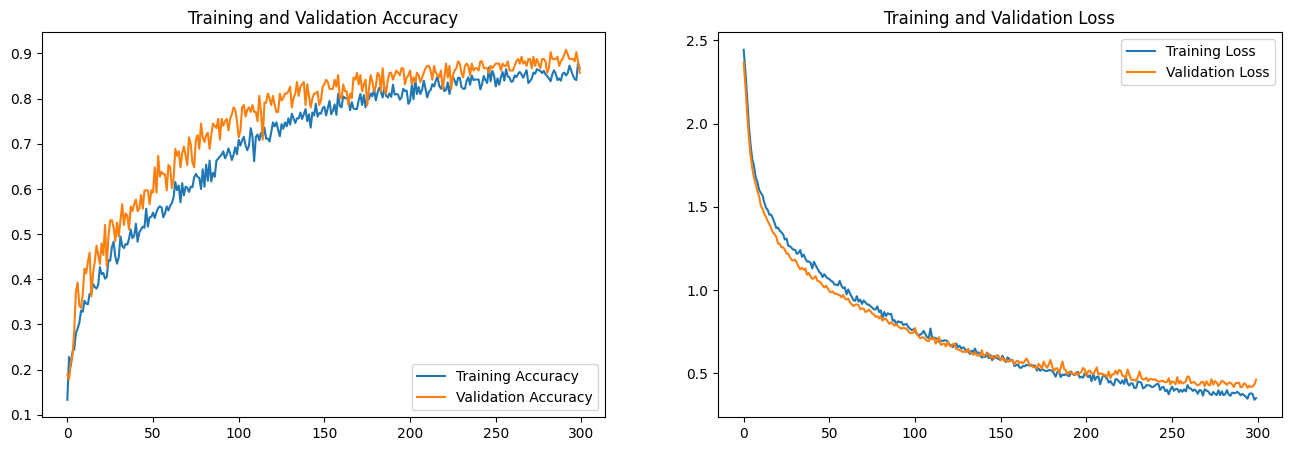

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Sigmoid

In [42]:
predictions = model.predict(X_test)
predictions = 1 / (1 + np.exp(-predictions))

predictions = predictions > 0.75

7/7 [==============================] - 0s 820us/step


/var/folders/dp/dtjy860d4jz18nc86phz4n7m0000gn/T/ipykernel_78827/773139084.py:2: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-predictions))


## Cleaning optimisation

In [43]:
safe_class_prediction = []
for i in range(predictions.shape[0]):
    safe_class_prediction.append(np.where(predictions[i] == True)[0][-1])

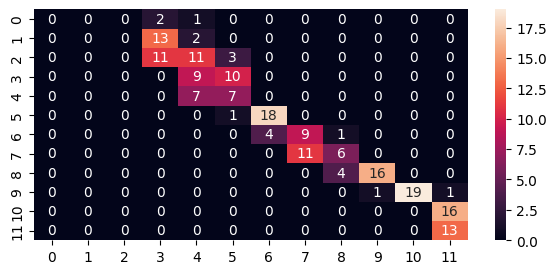

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
sns.heatmap(confusion_matrix(y_test, safe_class_prediction), annot=True, ax=ax)
plt.show()

## Cleaning Metrics

In [45]:
def get_safe_flush_accuracy(y_true, y_pred):
    return np.mean(y_pred >= y_true)

In [46]:
safe_accuracy = get_safe_flush_accuracy(y_test, safe_class_prediction)

## Water consumption

In [47]:
mean_absolute_error(y_test, safe_class_prediction)

1.0612244897959184

## Cost-Benefit Analysis

In [49]:
from collections import Counter

# Environmental and Economic Impact Analysis
flush_level_to_water_volume = {1: 1.5, 2: 1.9, 3: 2.4, 4: 2.8, 5: 3.3, 6: 3.8, 7: 4.2, 8: 4.7, 9: 5.2, 10: 5.6, 11: 6.1
                                  }
level_counts = Counter(safe_class_prediction)

total_volume = 0
total_predictions = 0

for level, count in level_counts.items():
    volume = flush_level_to_water_volume.get(level, 0)
    total_volume += volume * count
    total_predictions += count

# Calculate the average flush volume
if total_predictions > 0:
    average_flush_volume = total_volume / total_predictions
else:
    average_flush_volume = 0

# Constants
water_price_per_thousand_liters = 4  # Price in euros
rooms = 100  # Number of rooms in the hotel
flushes_per_room_per_day = 5  # Number of flushes per room per day

classical_volume_per_flush = 6  # Classical system water usage in liters
savings_per_flush = classical_volume_per_flush - average_flush_volume

water_cost_per_liter = water_price_per_thousand_liters / 1000  # Convert price to cost per liter
daily_cost_savings = savings_per_flush * water_cost_per_liter * flushes_per_room_per_day * rooms
annual_cost_savings = daily_cost_savings * 365
annual_water_savings = savings_per_flush * flushes_per_room_per_day * rooms * 365

# Print the results
print("Average Volume Per Flush: {:.2f} liters".format(average_flush_volume))
print("Savings Per Flush: {:.2f} liters".format(savings_per_flush))
print("Daily Cost Savings: €{:.2f}".format(daily_cost_savings))
print("Annual Cost Savings: €{:.2f}".format(annual_cost_savings))
print("Annual Water Savings: {:.2f} liters".format(annual_water_savings))

Average Volume Per Flush: 4.15 liters
Savings Per Flush: 1.85 liters
Daily Cost Savings: €3.71
Annual Cost Savings: €1352.73
Annual Water Savings: 338183.67 liters
